loading dataset to memory...


100%|██████████| 24480/24480 [01:09<00:00, 351.01it/s] 


loading dataset to memory...


100%|██████████| 24192/24192 [01:07<00:00, 358.73it/s]


find min max scale...
runs/combine\2022-05-18-23-12-gcn_lstm_lnr_comloss_0.0001\model.pt
start dataset testing...
Graph(
  (conv): GCNConv(50, 50)
  (lstm): LSTM(1, 1, batch_first=True)
  (lnr): Linear(in_features=50, out_features=3, bias=True)
)


100%|██████████| 8134/8134 [04:00<00:00, 33.86it/s]


avg loss 3.144203887579304
garage loss 9.66976900475999
meter loss 3.022602995435859
test score ga {'ga_mae_15min': 2.694058429221718, 'ga_mape_15min': 99.92748032948118}
test score me {'me_acc_15min': 0.1596377675277782, 'me_f1_15min': 0.0}


array([[1.76377723e-03, 1.84122677e+01, 1.80111027e+00, ...,
        2.54009604e+00, 3.76953030e+00, 3.32041192e+00],
       [1.76377723e-03, 1.86425190e+01, 1.81156051e+00, ...,
        2.61210656e+00, 3.76953030e+00, 3.31922626e+00],
       [1.76377723e-03, 1.86793079e+01, 1.82055199e+00, ...,
        2.68431687e+00, 3.76953030e+00, 3.31849480e+00],
       ...,
       [1.30100908e+01, 1.83619995e+01, 1.69363384e+01, ...,
        1.95934105e+00, 3.67860198e+00, 3.67860198e+00],
       [1.34436960e+01, 1.87120190e+01, 1.69363384e+01, ...,
        1.96700621e+00, 3.67859149e+00, 3.67859149e+00],
       [1.38838835e+01, 1.90509739e+01, 1.69363384e+01, ...,
        1.97549486e+00, 3.67854953e+00, 3.67854953e+00]])

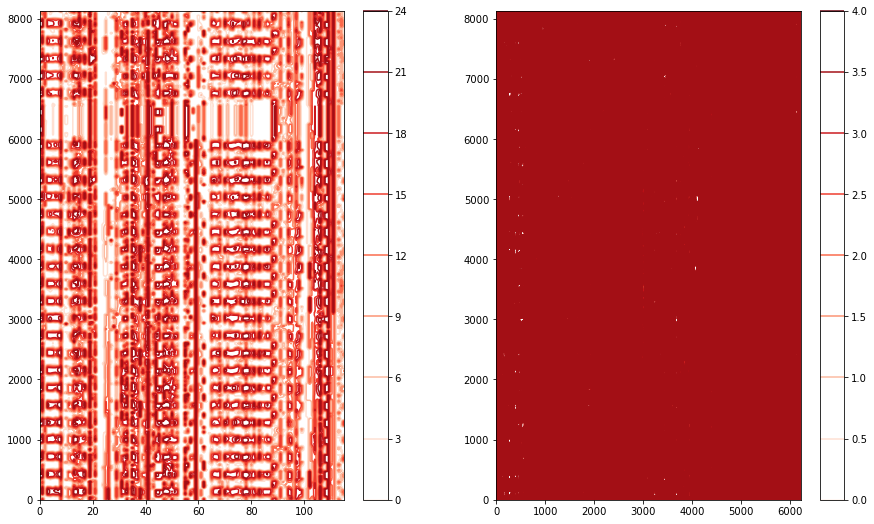

In [1]:
from utils import *
from dataset import *
import os

dataset = CombinedDataset(root='2021', len_x=50)
train_set = dataset[:16000]
test_set = dataset[16000:]

scalar = dataset_scalar(train_set)
train_set.set_scalar(*scalar)
test_set.set_scalar(*scalar)

path = 'runs/combine'

folder = os.listdir(path)[-1]

model_path = os.path.join(path, folder, 'model.pt')

model = torch.load(model_path)

print(model_path)

test_dataset(model, test_set)

start dataset testing...
last


100%|██████████| 8134/8134 [03:59<00:00, 33.91it/s]


avg loss 0.4022591387056048
garage loss 0.00990706876172179
meter loss 0.40957043832222956
test score ga {'ga_mae_15min': 0.0381196139686486, 'ga_mape_15min': 15.811971738996803}
test score me {'me_acc_15min': 0.9286802154935662, 'me_f1_15min': 0.9572006094228607}


array([[0.        , 0.00083299, 0.        , ..., 0.31326175, 0.31326175,
        0.31326175],
       [0.        , 0.00069415, 0.        , ..., 0.31326175, 0.31326175,
        0.31326175],
       [0.        , 0.00124948, 0.        , ..., 0.31326175, 0.31326175,
        0.31326175],
       ...,
       [0.        , 0.        , 0.        , ..., 0.31326175, 0.31326175,
        0.31326175],
       [0.        , 0.        , 0.        , ..., 0.31326175, 0.31326175,
        0.31326175],
       [0.        , 0.        , 0.        , ..., 0.31326175, 0.31326175,
        0.31326175]])

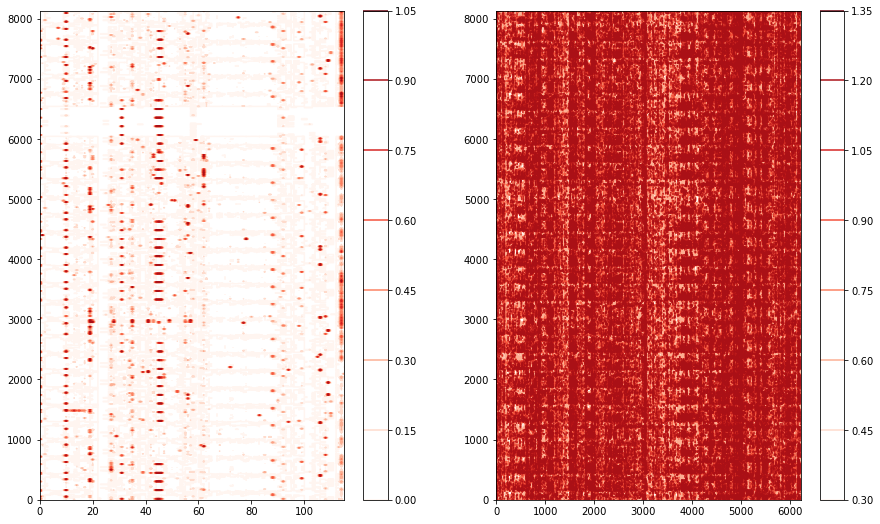

In [2]:
test_dataset('last', test_set)

## 2021

loading dataset to memory...


100%|██████████| 24192/24192 [01:22<00:00, 293.04it/s]


find min max scale...
runs/garage\2022-06-06-02-32-2021_lstm_lnr_smooth\model.pt
start dataset testing...
Graph(
  (lstm): LSTM(1, 1, batch_first=True)
  (lnr): Linear(in_features=50, out_features=3, bias=True)
)


100%|██████████| 24134/24134 [05:29<00:00, 73.15it/s]


avg loss 0.0023110593462576383
test score {'ga_mae_15min': 0.014881826, 'ga_mape_15min': 14.121551, 'ga_mae_30min': 0.025036076, 'ga_mape_30min': 18.817034, 'ga_mae_45min': 0.036546662, 'ga_mape_45min': 23.071283}


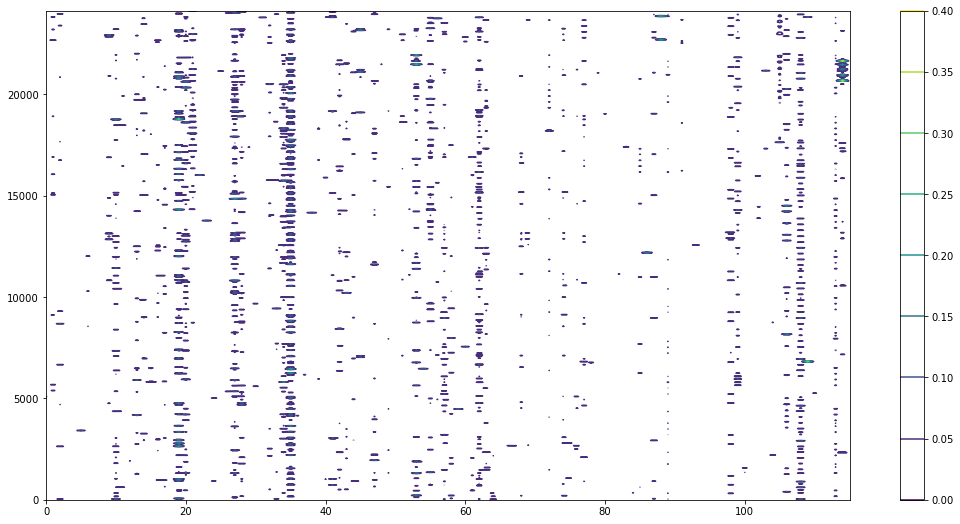

In [1]:
from utils import *
from dataset import *

root = '2021/garage_dataset_smooth'
# root = 'meter_dataset'

dataset = ParkDataset(root, len_x=50, in_memory=True)
train_set = dataset[:16000]
test_set = dataset[16000]

scalar = dataset_scalar(train_set)
dataset.set_scalar(*scalar)

path = 'runs/garage'

folder = os.listdir(path)[-1]

model_path = os.path.join(path, folder, 'model.pt')

model = torch.load(model_path)

print(model_path)

model_loss_matrix, model_score_matrix = test_dataset(model, dataset)

start dataset testing...
last


100%|██████████| 24134/24134 [04:37<00:00, 87.11it/s]


avg loss 0.0027373717507646607
test score {'ga_mae_15min': 0.013478451, 'ga_mape_15min': 9.115417, 'ga_mae_30min': 0.026529983, 'ga_mape_30min': 15.301657, 'ga_mae_45min': 0.03910328, 'ga_mape_45min': 19.881449}


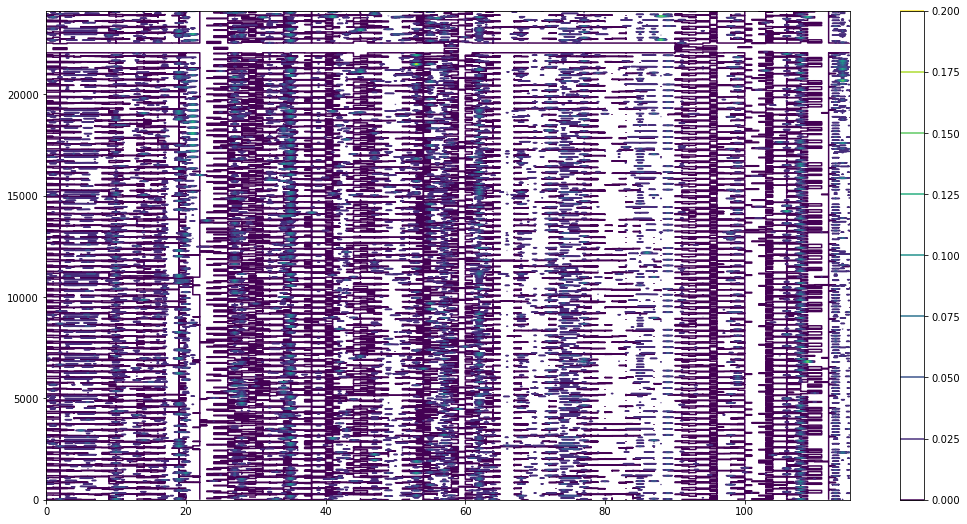

In [2]:
last_loss_matrix, last_score_matrix = test_dataset('last', dataset)

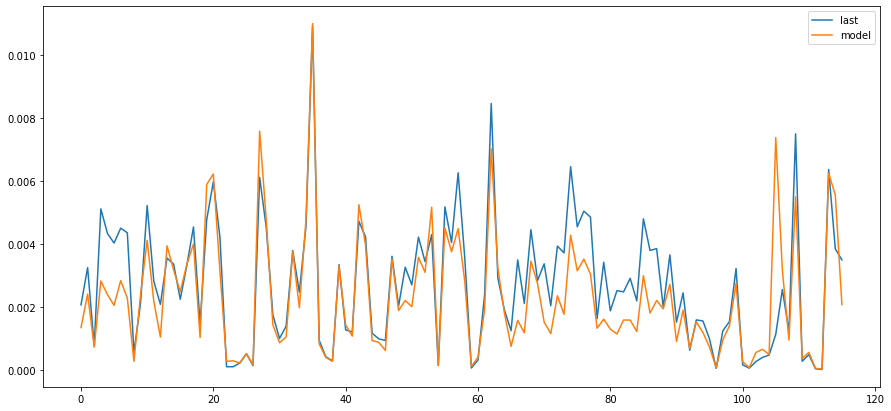

In [3]:
plt.figure(figsize=(15, 7))
plt.plot(last_loss_matrix.mean(axis=0), label='last')
plt.plot(model_loss_matrix.mean(axis=0), label='model')
plt.legend()

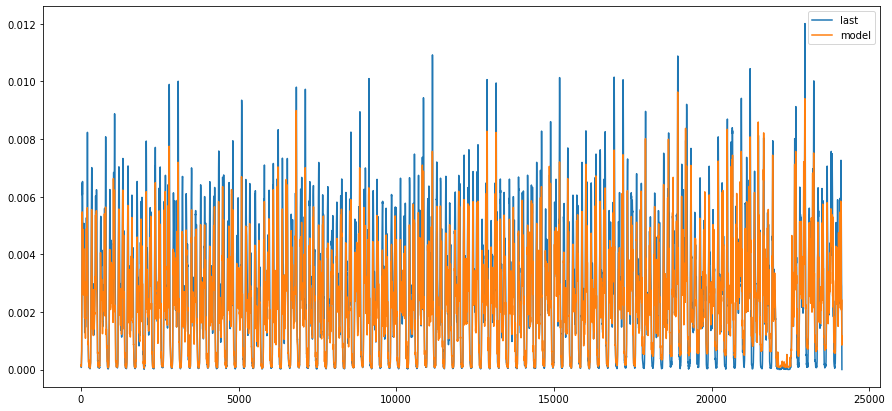

In [4]:
plt.figure(figsize=(15, 7))
plt.plot(last_loss_matrix.mean(axis=1), label='last')
plt.plot(model_loss_matrix.mean(axis=1), label='model')
plt.legend()

In [5]:
model_mae, model_mape = model_score_matrix.score_np()
last_mae, last_mape = last_score_matrix.score_np()

model_mape.shape

(24134, 116, 3)

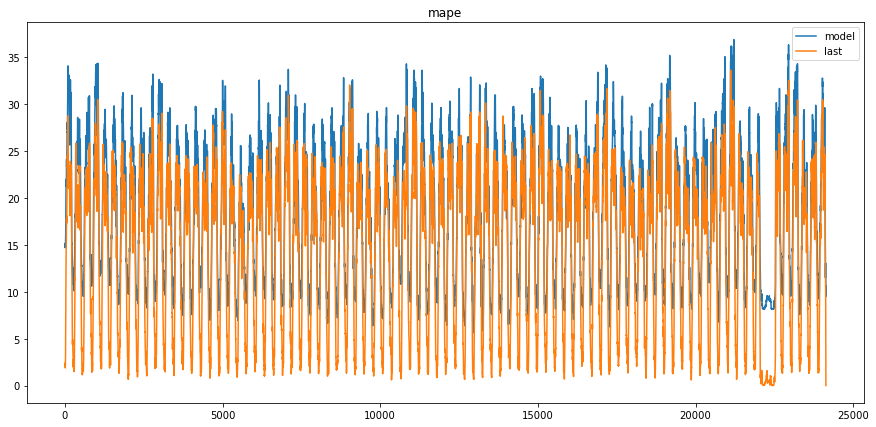

In [6]:
plt.figure(figsize=(15, 7))
plt.title('mape')
plt.plot(model_mape.mean(axis=2).mean(axis=1), label='model')
plt.plot(last_mape.mean(axis=2).mean(axis=1), label='last')
plt.legend()

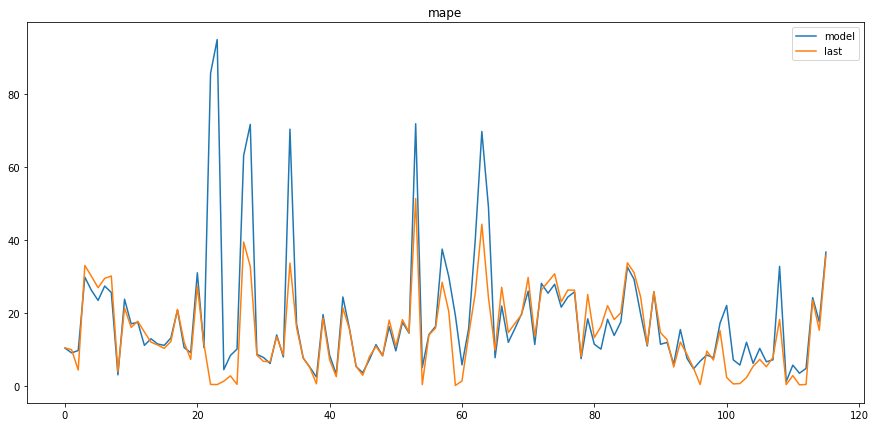

In [15]:
plt.figure(figsize=(15, 7))
plt.title('mape')
plt.plot(model_mape.mean(axis=2).mean(axis=0), label='model')
plt.plot(last_mape.mean(axis=2).mean(axis=0), label='last')
plt.legend()

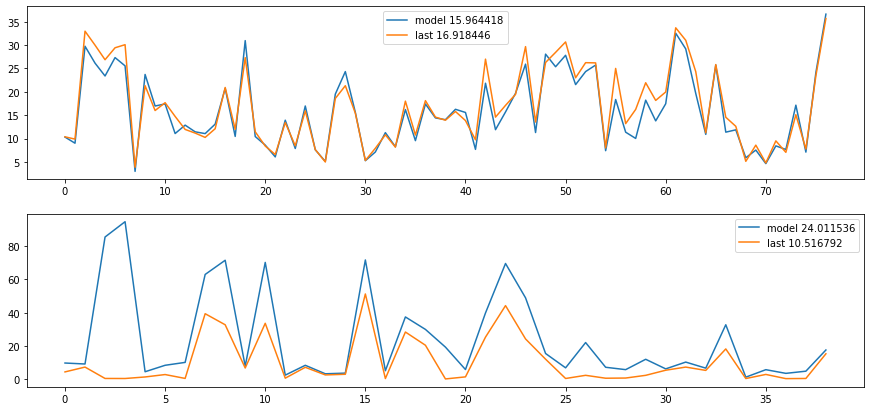

In [28]:
model_mape_ga = model_mape.mean(axis=2).mean(axis=0)
last_mape_ga = last_mape.mean(axis=2).mean(axis=0)

good_id = (model_mape_ga / last_mape_ga) < 1.15

plt.figure(figsize=(15, 7))
plt.title('mape')

plt.subplot(2, 1, 1)
plt.plot(model_mape_ga[good_id], label='model %f'%(model_mape_ga[good_id].mean()))
plt.plot(last_mape_ga[good_id], label='last %f'%(last_mape_ga[good_id].mean()))
plt.legend()

bad_id = good_id == False
plt.subplot(2, 1, 2)
plt.plot(model_mape_ga[bad_id], label='model %f'%(model_mape_ga[bad_id].mean()))
plt.plot(last_mape_ga[bad_id], label='last %f'%(last_mape_ga[bad_id].mean()))
plt.legend()

In [29]:
np.save('2021/white_list.npy', good_id)